In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC


In [ ]:
df=pd.read_csv('/content/iris_new.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.0,3.2,1.2,0.2,Iris-setosa
1,6.3,2.5,4.9,1.5,Iris-versicolor
2,5.5,2.6,4.4,1.2,Iris-versicolor
3,6.0,2.7,5.1,1.6,Iris-versicolor
4,4.9,2.5,4.5,1.7,Iris-virginica


In [ ]:
#task 1: explore wwether species is envenly distributed
#task 2: explore the distribution of all numeric varaibles
#task 3: what is the relationship between species and PetalWidthCM

Explore wether species is evenly distributed

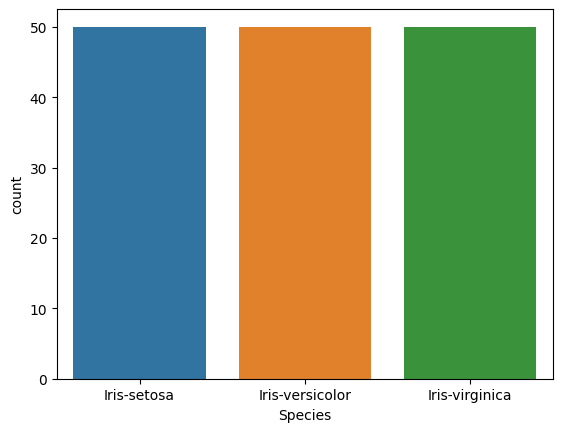

In [ ]:
sns.countplot(data=df, x='Species', hue='Species')
plt.show()

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


task 2: explore the distribution and correlation of all numeric varaibles


In [ ]:
features=df.iloc[:,0:4]
features.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.2,1.2,0.2
1,6.3,2.5,4.9,1.5
2,5.5,2.6,4.4,1.2
3,6.0,2.7,5.1,1.6
4,4.9,2.5,4.5,1.7


In [ ]:
coco=features.corr()
coco

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


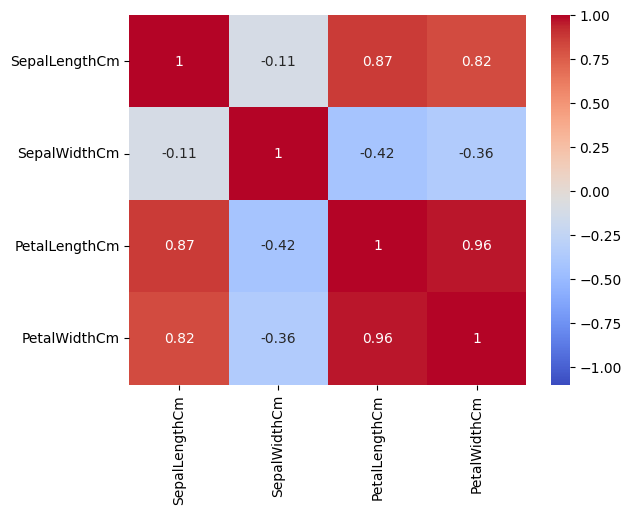

In [ ]:
sns.heatmap(coco, annot=True, cmap='coolwarm', vmin=1, vmax=-1)
plt.show()

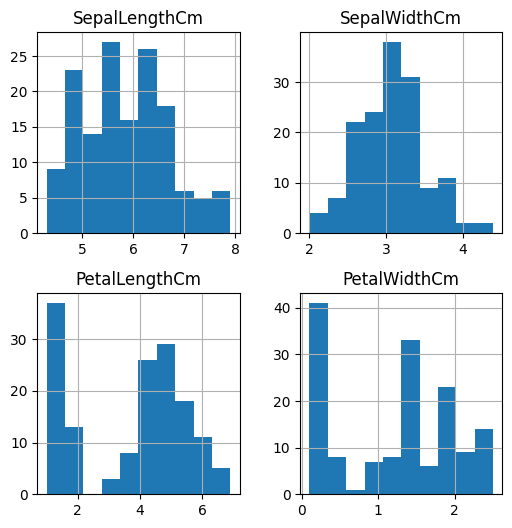

In [ ]:
#show distribution of numeric variables in one graph
features.hist(figsize=(6,6))
plt.show()

task 3: what is the relationship between species and PetalWidthCM

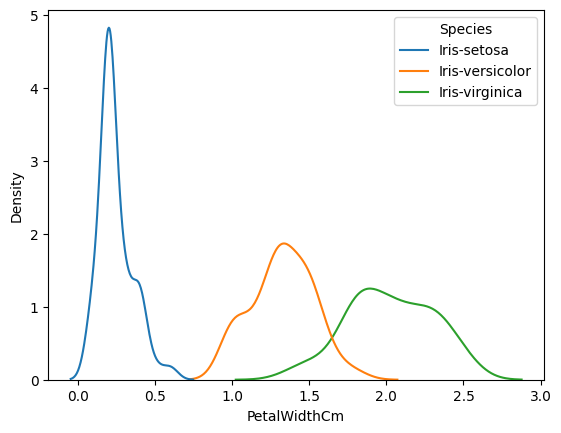

In [ ]:
sns.kdeplot(data=df, x='PetalWidthCm', hue='Species', common_norm=False)
plt.show()

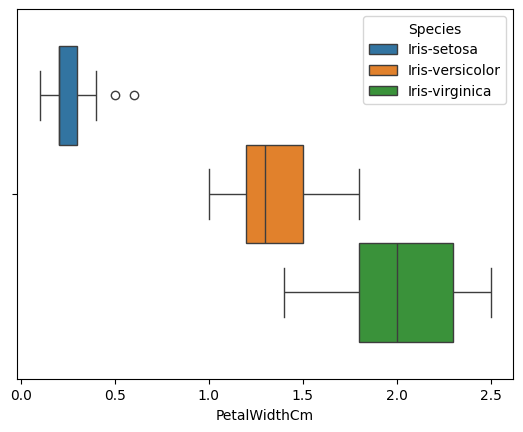

In [ ]:
sns.boxplot(data=df, x='PetalWidthCm', hue='Species')
plt.show()

In [ ]:
#construct features
features=df.iloc[:,0:4]
features.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.2,1.2,0.2
1,6.3,2.5,4.9,1.5
2,5.5,2.6,4.4,1.2
3,6.0,2.7,5.1,1.6
4,4.9,2.5,4.5,1.7


In [ ]:
#cosntruct target set
target=df.iloc[:,-1]
target.head()

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-versicolor
4,Iris-virginica


In [ ]:
#split data into training and testing (70 % and 30%)

train_x, test_x, train_y, test_y=train_test_split(features, target, test_size=0.3)

In [ ]:
#construct the SVM Model
classifier=SVC()
classifier.fit(train_x, train_y)

SVC()

In [ ]:
#accuracy evaluation

pred_y=classifier.predict(test_x)
print('accuracy score: ', accuracy_score(test_y, pred_y))

accuracy score:  0.9777777777777777


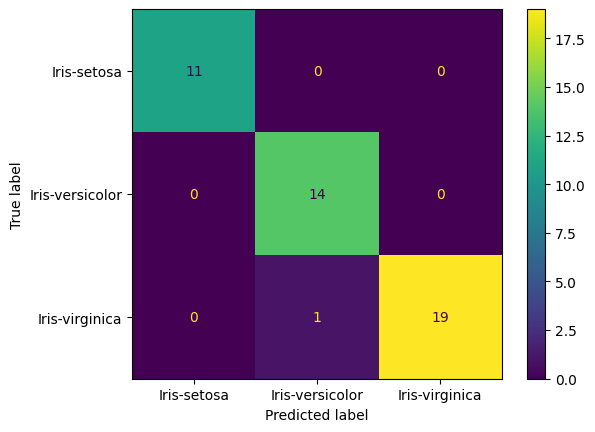

In [ ]:
#plot confusion matrix
cm=confusion_matrix(test_y, pred_y, labels=classifier.classes_)
cmd=ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmd.plot()
plt.show()


In [ ]:
#model evaluation

rp= classification_report(test_y,pred_y)
print(rp)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.95      0.97        20

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

